Завдання для Практичної Роботи з Теми "Computer Vision"
Мета:
Розробка та тренування конволюційної нейронної мережі (CNN) за допомогою TensorFlow для бінарної класифікації зображень їжі.

Дані:
Набір даних: 10_food_classes_all_data.zip, що містить зображення десяти різних класів їжі.

Завдання:
Вибір Класів для Класифікації:

Використовуйте останню цифру свого номера у списку групи для вибору першого класу (наприклад, 1 для першого класу, 2 для другого, і так далі, з циклічним поверненням до 1 після 10).
Другий клас вибирається на основі суми цифр вашого номера у списку. Наприклад, якщо ваш номер - 12, сума цифр буде 1 + 2 = 3, тому другий клас буде 3-м у списку. Якщо сума перевищує 10, продовжуйте віднімати 10, доки не отримаєте число від 1 до 10.
Попередня Обробка Даних:

Завантажте та розпакуйте набір даних.
Поділіть дані на тренувальний та тестовий набори.
Виконайте необхідну попередню обробку даних (нормалізація, ресайзинг тощо).
Розробка Моделі CNN:

Створіть модель CNN за допомогою TensorFlow.
Ви можете експериментувати з різними архітектурами та гіперпараметрами.
Тренування та Оцінка Моделі:

Тренуйте модель на тренувальному наборі даних.
Оцініть ефективність моделі на тестовому наборі.
Запишіть результати точності та інші метрики ефективності.
Аналіз Результатів:

Проаналізуйте отримані результати.
Оцініть, наскільки ефективно модель розрізняє між обраними класами.
Обговоріть можливі шляхи покращення моделі.
Додаткові Вимоги:
Використовуйте TensorFlow для реалізації проекту.
Поділіть процес роботи на чіткі етапи.
Забезпечте чистоту та коментування коду.

In [12]:
import pathlib
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Шляхи до тренувальних та тестових даних 
train_data_dir = pathlib.Path("train")
test_data_dir = pathlib.Path("test")

# номера групи 
group_number = 12
first_class_index = group_number % 10
second_class_index = sum(map(int, str(group_number))) % 10

# Отримання всіх класів та вибір підмножини для тренування
all_class_names = np.array(sorted([item.name for item in train_data_dir.glob('*') if item.is_dir()]))
selected_classes = [all_class_names[first_class_index - 1], all_class_names[second_class_index - 1]]

class_names_list = selected_classes


# Поділ даних на тренувальний та тестовий набори
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(224, 224), batch_size=32,
                                                    class_mode='categorical', subset='training', classes=class_names_list)
val_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(224, 224), batch_size=32,
                                                  class_mode='categorical', subset='validation', classes=class_names_list)

# Створення моделі CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(selected_classes), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Тренування моделі
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

# Оцінка моделі на тестовому наборі
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(224, 224), batch_size=32,
                                                 class_mode='categorical', classes=class_names_list)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")


Found 1200 images belonging to 2 classes.
Found 300 images belonging to 2 classes.



Epoch 1/10


38/38 [==============================] - 109s 3s/step - loss: 0.7867 - accuracy: 0.5800 - val_loss: 0.5186 - val_accuracy: 0.7400
Epoch 2/10
38/38 [==============================] - 83s 2s/step - loss: 0.5678 - accuracy: 0.7092 - val_loss: 0.4901 - val_accuracy: 0.7333
Epoch 3/10
38/38 [==============================] - 85s 2s/step - loss: 0.4594 - accuracy: 0.7908 - val_loss: 0.4595 - val_accuracy: 0.7933
Epoch 4/10
38/38 [==============================] - 90s 2s/step - loss: 0.3446 - accuracy: 0.8458 - val_loss: 0.4478 - val_accuracy: 0.8167
Epoch 5/10
38/38 [==============================] - 92s 2s/step - loss: 0.2428 - accuracy: 0.9000 - val_loss: 0.4982 - val_accuracy: 0.8200
Epoch 6/10
38/38 [==============================] - 94s 2s/step - loss: 0.1414 - accuracy: 0.9442 - val_loss: 0.6135 - val_accuracy: 0.7467
Epoch 7/10
38/38 [==============================] - 94s 2s/step - loss:

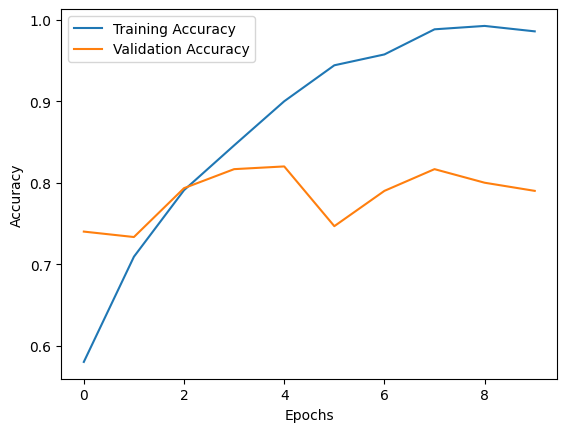

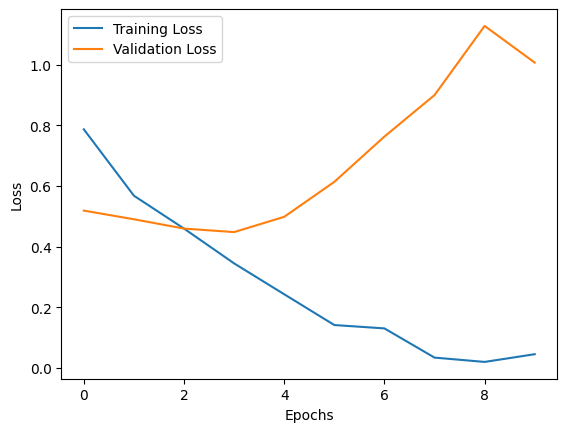

In [13]:
import matplotlib.pyplot as plt

# Графік точності
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Графік втрат
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
